In [61]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [62]:
def read_file(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()
    data = {}
    for line in lines[1:]:
        tokens = line.strip().split(',')
        method, bs, e2e, requests = tokens[0], int(tokens[1]), tokens[6], tokens[7]
        req_lat = [float(_) for _ in requests.split('+')]
        if 'nan' in e2e:
            req_lat = [0]
        data[(method, bs)] = (e2e, sum(req_lat)/len(req_lat), req_lat)
    return data

In [63]:
data = read_file('shared_prompt_exp_2.csv')

In [64]:
data

{('vllm_diverged', 8): (' 122.745905982',
  14.516362960769232,
  [10.28447042,
   11.134411035,
   11.718761328,
   12.796555863,
   13.46115195,
   8.560789955,
   19.94581481,
   19.955273625,
   8.472846973,
   9.735769819,
   15.246178982,
   8.595708072,
   11.079026837,
   30.834130863,
   15.226253082,
   8.216428232,
   15.276051115,
   10.322664434,
   10.324315167,
   16.541619229,
   34.962541473,
   25.651620804,
   9.256551094,
   9.84473882,
   16.493726317,
   16.503970416,
   17.488305331,
   11.365138947,
   7.991469018,
   11.980870907,
   15.825797552,
   15.426444794,
   11.23892095,
   16.116979863,
   11.558933413,
   10.677873851,
   8.705805493,
   13.64553777,
   12.454405991,
   9.336300325,
   35.979376324,
   12.497734298,
   9.331464188,
   35.708496334,
   9.638933952,
   8.915082101,
   9.555763477,
   7.696516726,
   17.598611281,
   8.389761952,
   14.440701423,
   9.450664522,
   8.952710243,
   35.201822136,
   8.719868237,
   14.666084407,
   35.635

In [65]:

batch_sizes = [8,16,32,64]
systems = ['parrot_shared', 'vllm_shared', 'vllm_diverged', ]
hatches = ['', '\\', '/', 'x']
colors = [
"#d73027",
"#fee090",
"#91bfdb",
"#4575b4"]

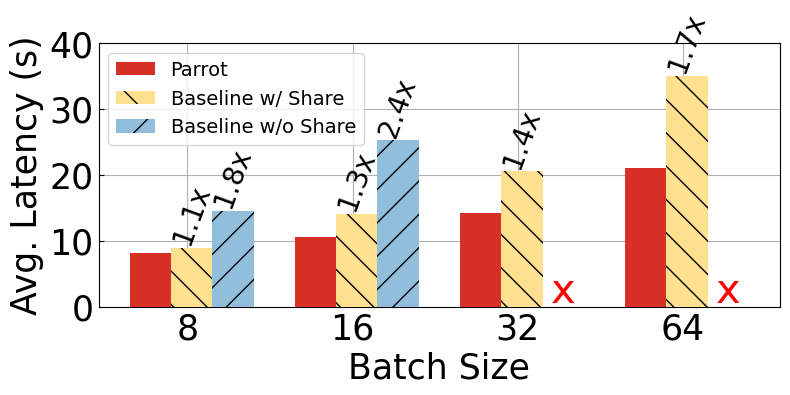

In [74]:

names = {
    'parrot_shared': 'Parrot',
    'vllm_shared': 'Baseline w/ Share',
    'vllm_diverged': 'Baseline w/o Share'
}

# Generate the chart
x = np.arange(len(batch_sizes))
width = 0.25

fig, ax = plt.subplots(1, 1, figsize=(8,4))

plt.grid(True)
rects = []
for i, system in enumerate(systems):
    rect = ax.bar(x - width/2 + i*width-0.1, [data[(system,bs)][1] for bs in batch_sizes], width,  hatch = hatches[i], color = colors[i], label=names[system],zorder=3) # hatches
    rects.append(rect)

    if system == 'parrot_shared':
        continue
    speedup_values = [data[(system,bs)][1]/data[('parrot_shared',bs)][1] for bs in batch_sizes]
    for rect, speedup in zip(rect, speedup_values):
        if speedup < 0.1:
            continue
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                '{:.1f}x'.format(speedup),
                ha='center', va='bottom', rotation=70,
                fontsize=20)
    
ax.text(2.2, 0.6, 'x', color='r', fontsize=30)
ax.text(3.2, 0.6, 'x', color='r', fontsize=30)
# plt.legend(loc='upper left', prop = { "size": 18 },)
ax.tick_params(axis='y', labelsize=25, direction='in')
ax.tick_params(axis='x', labelsize=25, direction='in')
ax.set_xlabel('Batch Size', fontsize=25)
ax.set_ylabel('Avg. Latency (s)', fontsize=25)
ax.set_xticks([_ for _ in x])
ax.set_xticklabels(batch_sizes)
plt.legend(loc='upper left', prop = { "size": 14 }) #, bbox_to_anchor= (0., 0.97))
plt.ylim([0,40])
plt.yticks([0,10,20,30,40])

plt.tight_layout()
plt.savefig('share_bs.pdf')